# Frequency Distribution, Tokenization, Stemming and POS Tagging

## Importing and downloading necessary packages

In [ ]:
import pandas as pd
import numpy as np
import random
import nltk
import spacy
from spacy.lang.en import English # updated
from spacy import displacy
import re
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
conda install -c conda-forge wordcloud=1.8.1

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - wordcloud=1.8.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h033912b_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37hf985489_0         141 KB  conda-forge
    conda-4.10.3               |   py37hf985489_2         3.0 MB  conda-forge
    openssl-1.1.1l             |       h0d85af4_0         1.9 MB  conda-forge
    wordcloud-1.8.1            |   py37h271585c_1         169 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py37h271585c_1

The following packages will be UPDATED:

  conda              pkgs/mai

In [ ]:
!python3 -m spacy download en_core_web_lg
!python3 -m spacy download en

     |████████████████████████████████| 777.1 MB 11 kB/s  eta 0:00:013  |▍                               | 8.9 MB 7.5 MB/s eta 0:01:43     |▍                               | 9.2 MB 7.5 MB/s eta 0:01:43     |█▊                              | 42.6 MB 2.5 MB/s eta 0:04:52     |██▏                             | 51.4 MB 7.4 MB/s eta 0:01:39     |█████▍                          | 130.9 MB 2.4 MB/s eta 0:04:27     |█████▋                          | 135.4 MB 2.4 MB/s eta 0:04:25     |█████▋                          | 137.3 MB 2.1 MB/s eta 0:05:02     |██████▎                         | 151.4 MB 5.9 MB/s eta 0:01:46     |██████▎                         | 153.0 MB 5.9 MB/s eta 0:01:46     |██████▍                         | 156.3 MB 4.8 MB/s eta 0:02:11     |██████▋                         | 159.8 MB 4.8 MB/s eta 0:02:10     |███████▍                        | 179.0 MB 6.1 MB/s eta 0:01:38     |█████████▊                      | 236.8 MB 1.9 MB/s eta 0:04:43     |████████████▍                   | 29

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Reading data from the json file

In [ ]:
df_json=pd.read_json('reviewSelected100.json',lines=True)
reviews_df=pd.DataFrame(df_json)
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [ ]:
len(reviews_df)

15300

# 1. Frequency Distribution of Reviews of a Random Business (with and without stemming)

## Creating a dataframe consisting of all reviews combined together for each business.

In [ ]:
combined_df=(reviews_df.groupby('business_id')['text'].apply(lambda x: "{%s}" % ', '.join(x))).reset_index()
combined_df

,business_id,text
0,--I7YYLada0tSLkORTHb5Q,"{Had to get my wing fix, I like dry rubs on wi..."
1,-7XWJYkutqhIxLen7Grg1g,{Definite recommend. \n\nBut I never would hav...
2,0Rni7ocMC_Lg2UH0lDeKMQ,{We love Barros!! Usually go to other location...
3,0kPm1zEpeXFRg8D2phqgCQ,{Coffee is exponentially better than Starbucks...
4,1Fpk8ibHhZYnCw8fnGny8w,{Really love the food here! I was a HUGE fan o...
...,...,...
148,yHHVKa9joZAKiBDUp2SkKw,"{This coffee shop has great coffee, but more i..."
149,z8Em-bhZI3Mmspml7tj6tg,{This was the first time and probably the last...
150,zPEYgVqJ2QNKi45FJi2jvg,{Stopped by here for lunch yesterday. What a ...
151,zZ7KDK3GAkBUZzsaqB1A4Q,"{Staff is SO friendly, I was checked in on onc..."


## Returns a random index to select a random business

In [ ]:
def create_dataset():
    random.seed(42)
    return random.randint(0,len(combined_df)-1)

## Returns a random index to select a random review for pos tagging

In [ ]:
def create_index():
    return random.randint(0,len(reviews_df)-1)

## Returns set of stop words for tokenization

In [ ]:
def create_stop_words():
    return set(stopwords.words('english'))

## Returns list of tokens after filtering based on stop words

In [ ]:
def tokenization(text):
    text=text.lower()
    text=text[1:len(text)-2]
    stop_words=create_stop_words()
    tokenized_data=nltk.tokenize.word_tokenize(text)
    filtered_data_original=[]
    for word in tokenized_data:
        if word not in stop_words and word.isalnum()==True:
            filtered_data_original.append(word)
    return filtered_data_original

## Returns the frequency distribution of tokens in data

In [ ]:
def frequency_calculation(data):
    word_freq = nltk.FreqDist(data)
    return word_freq

## Returns the output of stemming on tokens in data

In [ ]:
def stemming(data):
    ps=PorterStemmer()
    stemmed_word=[]
    for word in data:
        stemmed_word.append(ps.stem(word))
    return stemmed_word

## Creates a word cloud for the frequency distribution calculated

In [ ]:
def create_plot(data):
    cloud = WordCloud(max_font_size=80,background_color='white',width=800,height=800).generate_from_frequencies(data)
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

## Returns sorted frequency distribution in descending order

In [ ]:
def sort_freq(data):
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    return sorted_data

## Selecting a business

In [ ]:
index=create_dataset()
index

28

## Tokenization 

In [ ]:
b1=combined_df['business_id'][index]
text=combined_df['text'][index]
text=text.lower()
# text=text[0:len(text)-2]
filtered_tokens=tokenization(text)
filtered_tokens

['stayed',
 'hotel',
 'saturday',
 'night',
 'cavs',
 'game',
 'drove',
 'past',
 'thought',
 'looked',
 'nice',
 'called',
 'booked',
 'room',
 'besides',
 'service',
 'ridiculously',
 'slow',
 'waiting',
 '2',
 'hours',
 'blankets',
 'found',
 'large',
 'blood',
 'stain',
 'comforter',
 'called',
 'downstairs',
 'complain',
 'man',
 'spoke',
 'said',
 'room',
 'would',
 'compensated',
 'got',
 'bill',
 'morning',
 'called',
 'put',
 'hold',
 'said',
 'handled',
 'go',
 'downstairs',
 'check',
 'told',
 'pay',
 'room',
 'stood',
 'good',
 '20',
 'minutes',
 'going',
 'back',
 'forth',
 'adam',
 'supervisor',
 'isaac',
 'told',
 'magically',
 'able',
 'read',
 'guys',
 'mind',
 'known',
 'would',
 'comping',
 '50',
 'instead',
 'entire',
 'room',
 'told',
 'room',
 'compensated',
 'going',
 'assume',
 'entire',
 'room',
 'ask',
 'comp',
 'room',
 'offered',
 'thought',
 'issue',
 'settled',
 'confirmed',
 'morning',
 'well',
 'argue',
 'heading',
 'home',
 'another',
 'thing',
 'irrita

## Frequency distribution of tokens without stemming

In [ ]:
word_freq=frequency_calculation(filtered_tokens)
word_freq_original=dict([(m, n) for m, n in word_freq.items()])
word_freq_original

{'stayed': 33,
 'hotel': 160,
 'saturday': 7,
 'night': 29,
 'cavs': 3,
 'game': 10,
 'drove': 2,
 'past': 2,
 'thought': 10,
 'looked': 5,
 'nice': 43,
 'called': 14,
 'booked': 3,
 'room': 155,
 'besides': 1,
 'service': 53,
 'ridiculously': 2,
 'slow': 3,
 'waiting': 7,
 '2': 9,
 'hours': 2,
 'blankets': 3,
 'found': 10,
 'large': 13,
 'blood': 2,
 'stain': 1,
 'comforter': 1,
 'downstairs': 12,
 'complain': 2,
 'man': 2,
 'spoke': 4,
 'said': 20,
 'would': 45,
 'compensated': 2,
 'got': 13,
 'bill': 7,
 'morning': 9,
 'put': 8,
 'hold': 2,
 'handled': 2,
 'go': 21,
 'check': 18,
 'told': 33,
 'pay': 6,
 'stood': 1,
 'good': 30,
 '20': 8,
 'minutes': 6,
 'going': 12,
 'back': 30,
 'forth': 2,
 'adam': 2,
 'supervisor': 1,
 'isaac': 1,
 'magically': 1,
 'able': 6,
 'read': 3,
 'guys': 3,
 'mind': 1,
 'known': 1,
 'comping': 1,
 '50': 2,
 'instead': 7,
 'entire': 7,
 'assume': 1,
 'ask': 6,
 'comp': 2,
 'offered': 6,
 'issue': 3,
 'settled': 1,
 'confirmed': 1,
 'well': 25,
 'argue': 

## Performing stemming

In [ ]:
stemmed_word=stemming(filtered_tokens)
stemmed_word

['stay',
 'hotel',
 'saturday',
 'night',
 'cav',
 'game',
 'drove',
 'past',
 'thought',
 'look',
 'nice',
 'call',
 'book',
 'room',
 'besid',
 'servic',
 'ridicul',
 'slow',
 'wait',
 '2',
 'hour',
 'blanket',
 'found',
 'larg',
 'blood',
 'stain',
 'comfort',
 'call',
 'downstair',
 'complain',
 'man',
 'spoke',
 'said',
 'room',
 'would',
 'compens',
 'got',
 'bill',
 'morn',
 'call',
 'put',
 'hold',
 'said',
 'handl',
 'go',
 'downstair',
 'check',
 'told',
 'pay',
 'room',
 'stood',
 'good',
 '20',
 'minut',
 'go',
 'back',
 'forth',
 'adam',
 'supervisor',
 'isaac',
 'told',
 'magic',
 'abl',
 'read',
 'guy',
 'mind',
 'known',
 'would',
 'comp',
 '50',
 'instead',
 'entir',
 'room',
 'told',
 'room',
 'compens',
 'go',
 'assum',
 'entir',
 'room',
 'ask',
 'comp',
 'room',
 'offer',
 'thought',
 'issu',
 'settl',
 'confirm',
 'morn',
 'well',
 'argu',
 'head',
 'home',
 'anoth',
 'thing',
 'irrit',
 'ask',
 'manag',
 'adam',
 'told',
 'manag',
 'avail',
 'believ',
 'even',
 '

## Frequency distribution of tokens after stemming

In [ ]:
freq=frequency_calculation(stemmed_word)
stemmed_word_freq=dict([(m, n) for m, n in freq.items()])
stemmed_word_freq

{'stay': 100,
 'hotel': 178,
 'saturday': 8,
 'night': 32,
 'cav': 3,
 'game': 12,
 'drove': 2,
 'past': 2,
 'thought': 11,
 'look': 23,
 'nice': 43,
 'call': 23,
 'book': 4,
 'room': 193,
 'besid': 1,
 'servic': 53,
 'ridicul': 2,
 'slow': 3,
 'wait': 12,
 '2': 9,
 'hour': 10,
 'blanket': 4,
 'found': 10,
 'larg': 13,
 'blood': 2,
 'stain': 1,
 'comfort': 12,
 'downstair': 12,
 'complain': 3,
 'man': 2,
 'spoke': 4,
 'said': 20,
 'would': 45,
 'compens': 2,
 'got': 13,
 'bill': 9,
 'morn': 11,
 'put': 8,
 'hold': 2,
 'handl': 2,
 'go': 33,
 'check': 34,
 'told': 33,
 'pay': 6,
 'stood': 1,
 'good': 31,
 '20': 8,
 'minut': 9,
 'back': 30,
 'forth': 2,
 'adam': 2,
 'supervisor': 1,
 'isaac': 1,
 'magic': 1,
 'abl': 6,
 'read': 4,
 'guy': 7,
 'mind': 1,
 'known': 1,
 'comp': 3,
 '50': 2,
 'instead': 7,
 'entir': 7,
 'assum': 1,
 'ask': 14,
 'offer': 11,
 'issu': 6,
 'settl': 1,
 'confirm': 2,
 'well': 25,
 'argu': 1,
 'head': 8,
 'home': 6,
 'anoth': 14,
 'thing': 19,
 'irrit': 1,
 'mana

## Word Cloud without Stemming

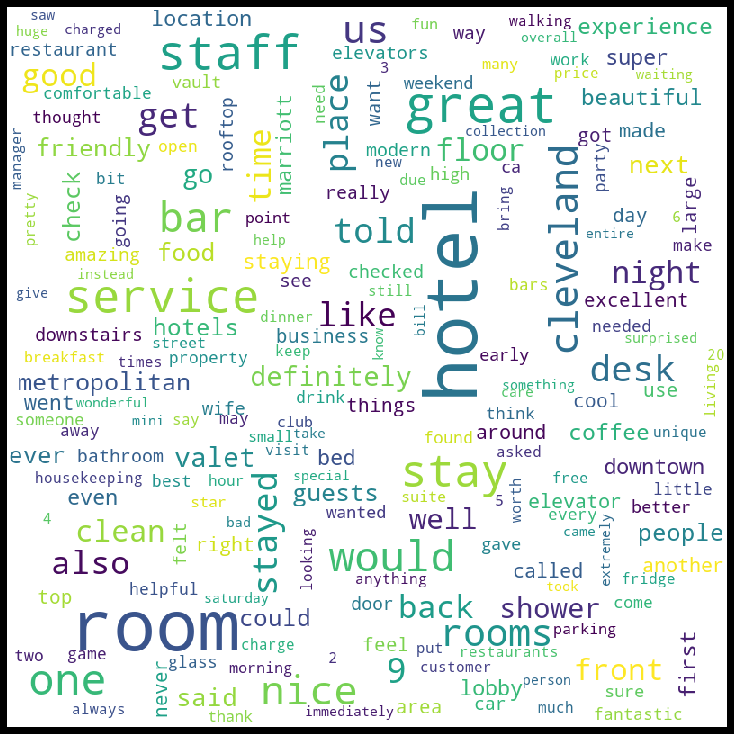

In [ ]:
create_plot(word_freq_original)

## Word Cloud with Stemming 

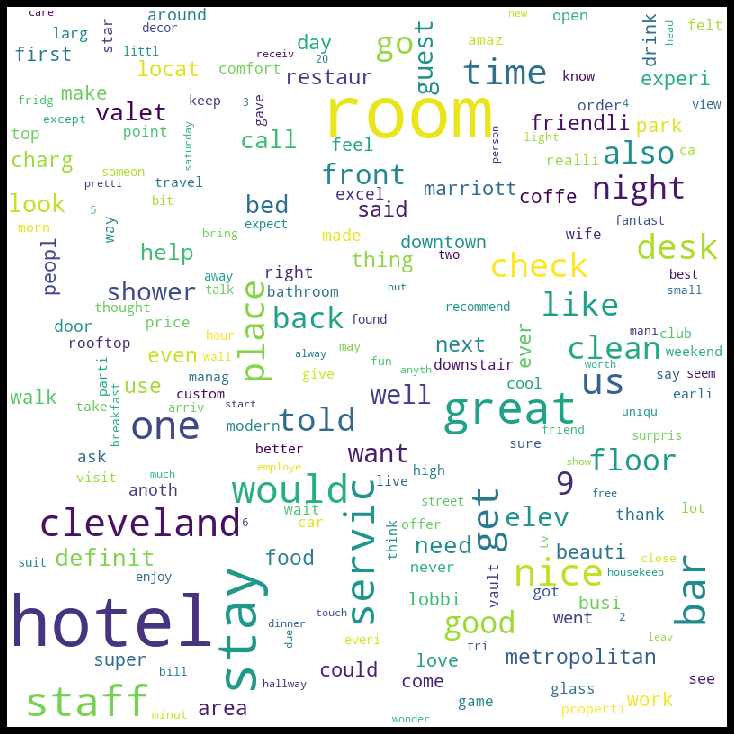

In [ ]:
create_plot(stemmed_word_freq)

## Top 10 words with highest frequency (without and with stemming respectively)

In [ ]:
sorted_original_data=sort_freq(word_freq_original)
sorted_original_data[0:10]

[('hotel', 160),
 ('room', 155),
 ('great', 65),
 ('staff', 57),
 ('service', 53),
 ('stay', 50),
 ('one', 47),
 ('would', 45),
 ('bar', 44),
 ('nice', 43)]

In [ ]:
sorted_stemmed_data=sort_freq(stemmed_word_freq)
sorted_stemmed_data[0:10]

[('room', 193),
 ('hotel', 178),
 ('stay', 100),
 ('great', 65),
 ('staff', 57),
 ('bar', 54),
 ('servic', 53),
 ('one', 48),
 ('would', 45),
 ('nice', 43)]

# 2. POS Tagging

## Selecting 5 sentences randomly for POS taggging

In [ ]:
l=0
sentences=[]
new_sentences=[]
while l<5:
    index=create_index()
    sentences=reviews_df['text'][index].split('.')
    for i in range(len(sentences)):
        if sentences[i]!='':
            new_sentences.append(sentences[i])
    l=len(new_sentences)
random.seed(42)
new_sentences

['What can I say I haven been to a lot of places and this one has probably been the best pizza I have every had',
 " I was in Arizona for 2 days and ate there pizza for 2 days lol I couldn't resist",
 ' nothing more to say but they are good',
 'Never use them',
 ' They have you pay for 10 mb and all I ever got was 6',
 '2 on the speed test ',
 ' They strung it out the whole year  ',
 ' Making excuses for the problem ',
 ' YOU WILL BE DISAPPOINTED !!!!! Glad to be rid of them ',
 '    Frank at the 1 800 number all but told me it was the best they could do ',
 '     Lousy , lousy ,lousy']

## POS Tagging using NLTK Package

In [ ]:
count=0
pos_data={}
for sentence in new_sentences[0:5]:
    tokens=nltk.tokenize.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)
    pos_data["Sentence "+str(count+1)]=tags
    count+=1
pos_data_df=pd.DataFrame.from_dict(pos_data,orient='index')
pos_data_df=pos_data_df.transpose()
pos_data_df

,Sentence 1,Sentence 2,Sentence 3,Sentence 4,Sentence 5
0,"(What, WP)","(I, PRP)","(nothing, NN)","(Never, RB)","(They, PRP)"
1,"(can, MD)","(was, VBD)","(more, JJR)","(use, VBP)","(have, VBP)"
2,"(I, PRP)","(in, IN)","(to, TO)","(them, PRP)","(you, PRP)"
3,"(say, VBP)","(Arizona, NNP)","(say, VB)",None,"(pay, VBP)"
4,"(I, PRP)","(for, IN)","(but, CC)",None,"(for, IN)"
5,"(haven, RB)","(2, CD)","(they, PRP)",None,"(10, CD)"
6,"(been, VBN)","(days, NNS)","(are, VBP)",None,"(mb, NNS)"
7,"(to, TO)","(and, CC)","(good, JJ)",None,"(and, CC)"
8,"(a, DT)","(ate, VB)",None,None,"(all, DT)"
9,"(lot, NN)","(there, EX)",None,None,"(I, PRP)"


## POS Tagging using spacy package

In [ ]:
nlp = spacy.load("en_core_web_sm")
pos_tag_spacy={}
count=1
for sentence in new_sentences:
    doc=nlp(sentence)
    temp=[]
    for token in doc:
        print(token,token.pos_)
        temp.append((token,token.pos_))
    pos_tag_spacy['Sentence '+str(count)]=temp
    count+=1
pos_spacy_df=pd.DataFrame.from_dict(pos_tag_spacy,orient='index')
pos_spacy_df=pos_spacy_df.transpose()
pos_spacy_df